# Лабораторная работа №2. Нормы векторов и матриц, решение переопределенной системы линейных уравнений, решение системы линейных уравнений с помощью LU разложения.
 Вариант №5 \\
 Завадский Никита Валерьевич


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

1. Создать квадратную матрицу из случайных целых чисел из [0,8] размера 6. Создать двe новые матрицы: первая – из двух последних строк исходной матрицы (должна получиться матрица размера 2х6), вторая – из двух первых столбцов матрицы (матрица размера 6х2).

содание матрицы целых чисел из [0,8] размера 6

In [ ]:
matA = np.random.randint(0,8,(6,6))
print(matA)

[[4 7 2 0 5 2]
 [1 4 0 7 3 4]
 [3 3 2 2 7 2]
 [4 4 4 0 0 7]
 [4 4 3 5 1 1]
 [0 6 3 1 7 6]]


создание матрицы из двух последних строк исходной матрицы

In [ ]:
matB = matA[-2:]
print(matB)

[[4 4 3 5 1 1]
 [0 6 3 1 7 6]]


создание матрицы из двух первых столбцов матрицы

In [ ]:
matC = matA[:,:2]
print(matC)

[[4 7]
 [1 4]
 [3 3]
 [4 4]
 [4 4]
 [0 6]]


2. Создать вектор-строку 1x10 из случайных целых чисел. Вычислить норму $\ || x ||_3 $ самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в python


создание матрицы

In [ ]:
D = np.random.randint(-10,10, 10)
print(D)

[  3 -10   2  -2  -9   5  -2  -5   2  -7]


собственная функция

In [ ]:
def norm_vec(vec,p):
  answ = 0
  for i in range(0,10):
    answ += np.power(abs(vec[i]),p)
  return np.power(answ, 1/p)

print(norm_vec(D,3))

13.353234170860826


проверка встроенной функцией

In [ ]:
print(np.linalg.norm(D,3))

13.353234170860826


3. Создать матрицу из случайных целых чисел. Найти норму матрицы Фробениуса с помощью самостоятельно написанного алгоритма, проверить результат с помощью linalg.norm() в Python .

создание матрицы

In [ ]:
F = np.random.randint(-10,10,(5,6))
print(F)

[[ -4  -3   3   3 -10   0]
 [  2   2 -10   8  -4  -5]
 [  4   8  -6  -4   7   4]
 [  0   7  -2   4   1   4]
 [  5 -10   1  -2   6  -3]]


собственная функция

In [ ]:
def norm_frob(Mat):
  answ = 0
  for i in range(0,Mat.shape[0]):
    for j in range(0,Mat.shape[1]):
      answ += np.power(abs(Mat[i,j]),2)
  return np.sqrt(answ)

print(norm_frob(F))

28.53068523537421


проверка встроенной функцией

In [ ]:
print(np.linalg.norm(F))

28.53068523537421


4.Найти псевдорешение системы $$\begin{cases}
15.7x_1 + 6.6x_2 - 5.7x_3 = -2.4\\
8.8x_1 - 6.7x_2 + 5.5x_3 = 5.6\\
6.3x_1 - 5.7x_2 - 23.4x_3 = 7.7\\
14.3x_1 + 8.7x_2 - 15.7x_3 = 23.4
\end{cases}$$

In [ ]:
A = np.array([[15.7, 6.6, -5.7],
              [8.8, -6.7, 5.5],
              [6.3, -5.7, -23.4],
              [14.3, 8.7, -15.7]])

B = np.array([-2.4, 5.6, 7.7, 23.4])

X = np.linalg.inv(A.transpose() @ A) @ A.transpose() @ B
print(X)

[ 0.37906884  0.12889361 -0.39275031]


проверка

In [ ]:
X_prov = np.linalg.pinv(A) @ B
print(X_prov)

[ 0.37906884  0.12889361 -0.39275031]


5. Даны пять точек (20; 19), (25; 16), (30; 27), (35, 24), (40, 31). Найти уравнение наиболее выгодной траектории. Построить график.


[0.64 4.2 ]


<ipython-input-105-25536c4e1ee0>:15: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(x, y, 40, 'g', 'o', alpha=0.8)


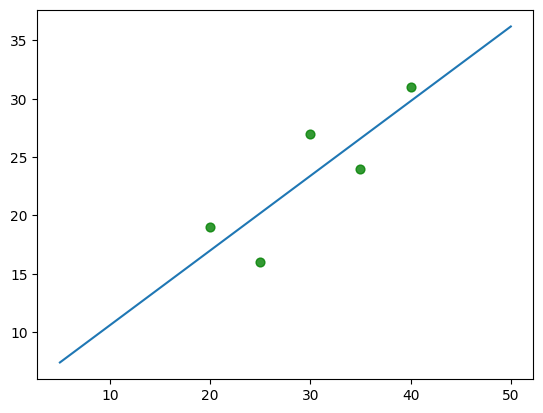

In [ ]:
A = np.array([[20, 1],
              [25, 1],
              [30, 1],
              [35, 1],
              [40, 1]])

B = np.array([19, 16, 27, 24, 31])

X = np.linalg.inv(A.transpose() @ A) @ A.transpose() @ B
print(X)

x = [20, 25, 30, 35, 40]
y = [19, 16, 27, 24, 31]

plt.scatter(x, y, 40, 'g', 'o', alpha=0.8)

X_support = np.linspace(5, 50, num=100)

Y_model = X[1] + X[0]*X_support

plt.plot(X_support, Y_model)
plt.show()

проверка

In [ ]:
X_prov = np.linalg.pinv(A) @ B
print(X_prov)

[0.64 4.2 ]


6. Создать произвольную верхнетреугольную матрицу А 4 порядка (не унитреугольную), вектор B произвольный. Решить систему AX = B

создание матрицы и ветора

In [ ]:
A = np.random.uniform(-10,10,(4,4))
A = np.triu(A, 0)
B = np.random.uniform(-10,10,4)
print(A)
print()
print(B)

[[-6.72036327 -0.85356422  8.60986683  9.81388895]
 [ 0.          0.87794351  1.69797008 -1.40825234]
 [ 0.          0.         -5.09688117  2.40195919]
 [ 0.          0.          0.         -0.92709585]]

[-7.96064615  3.032389    1.25298102 -2.50575833]


решение AX = B

In [ ]:
n = np.size(B)
x = np.zeros_like(B)
for i in range(n-1, -1, -1): x[i] = (B[i] - np.sum(A[i,i+1:] * x[i+1:]))/A[i,i]
print(x)

[5.71156959 5.80138579 1.02789207 2.70280394]


проверка

In [ ]:
print(np.linalg.solve(A,B))

[5.71156959 5.80138579 1.02789207 2.70280394]


7. Решить систему, используя LU разложение матрицы. LU разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран. Придерживаться плана решения, приведенного в пособии! Решение системы должно быть проверено встроенной функцией Python. $$\begin{cases}
15.7x_1 + 6.6x_2 - 5.7x_3 + 11.5x_4 = -2.4\\
8.8x_1 - 6.7x_2 + 5.5x_3 - 4.5x_4 = 5.6\\
6.3x_1 - 5.7x_2 - 23.4x_3 + 6.6x_4 = 7.7\\
14.3x_1 + 8.7x_2 - 15.7x_3 - 5.8x_4 = 23.4
\end{cases}$$


создание матриц

In [ ]:
A = np.array([[15.7, 6.6, -5.7, 11.5],
              [8.8, -6.7, 5.5, -4.5],
              [6.3, -5.7, -23.4, 6.6],
              [14.3, 8.7, -15.7, -5.8]])
B = np.array([-2.4, 5.6, 7.7, 23.4])

создание функуции

In [ ]:
def LU_decay(matA, n):
  U = np.zeros((n,n), float)
  L = np.identity(n, float)
  for i in range(n):
    for j in range(n):
      if i<=j: U[i,j] = matA[i,j] - L[i, :i] @ U[:i,j]
      if i>j: L[i,j] = (matA[i,j] - L[i, :j] @ U[:j,j])/U[j,j]
  return L, U

L, U = LU_decay(A, 4)
print("L:")
print(L)
print("U:")
print(U)

L:
[[ 1.          0.          0.          0.        ]
 [ 0.56050955  1.          0.          0.        ]
 [ 0.40127389  0.80278067  1.          0.        ]
 [ 0.91082803 -0.25852882  0.29403922  1.        ]]
U:
[[ 15.7          6.6         -5.7         11.5       ]
 [  0.         -10.39936306   8.69490446 -10.94585987]
 [  0.           0.         -28.09284008  10.77247504]
 [  0.           0.           0.         -22.2718727 ]]


проверка LU разложения

In [ ]:
print("A:")
print(A)
print("LU:")
print(L @ U)


A:
[[ 15.7   6.6  -5.7  11.5]
 [  8.8  -6.7   5.5  -4.5]
 [  6.3  -5.7 -23.4   6.6]
 [ 14.3   8.7 -15.7  -5.8]]
LU:
[[ 15.7   6.6  -5.7  11.5]
 [  8.8  -6.7   5.5  -4.5]
 [  6.3  -5.7 -23.4   6.6]
 [ 14.3   8.7 -15.7  -5.8]]


нахождение решения

[ 0.37037083  0.00135292 -0.67697422 -1.05065256]
[ 0.46606121  0.11028446 -0.56570877 -1.188659  ]
